##### load packeges

In [28]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path

>- Check Metadata of the GeoTIFF 

In [29]:
# Path to your GeoTIFF file
image_path = Path('../../../data/MULTISPECTRAL/grand_growth/patches/patch_143.tif')

with rasterio.open(image_path) as src:
    print("\n GeoTIFF Metadata:")
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"Total Bands: {src.count}")  # Number of spectral bands
    print(f"CRS: {src.crs}")  # Coordinate Reference System
    print(f"Transform: {src.transform}")  # Georeferencing info

    # List all bands
    print("\n Available Bands:")
    for i in range(1, src.count + 1):  # Bands are 1-indexed
        print(f"Band {i}: {src.descriptions[i-1]}")  # Print band descriptions (if available)



 GeoTIFF Metadata:
Width: 64, Height: 64
Total Bands: 5
CRS: None
Transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|

 Available Bands:
Band 1: None
Band 2: None
Band 3: None
Band 4: None
Band 5: None


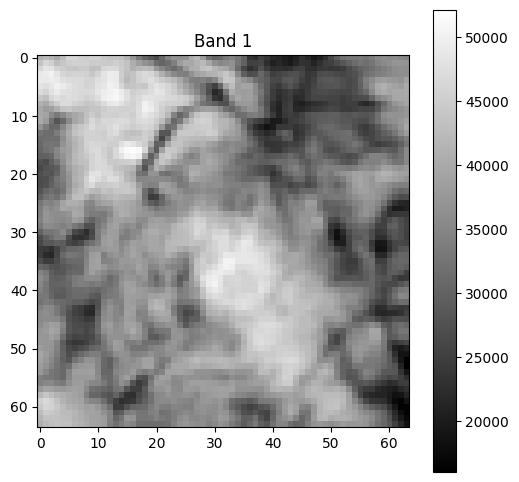

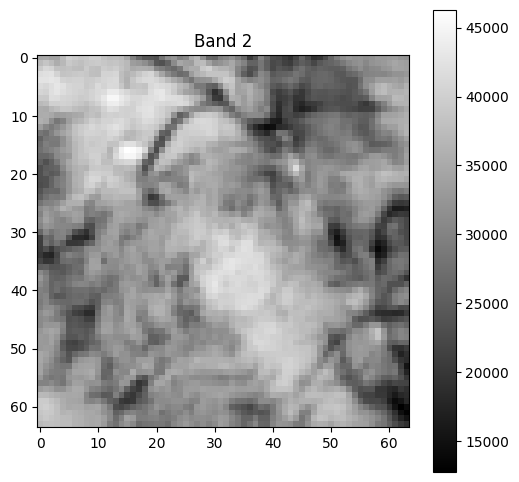

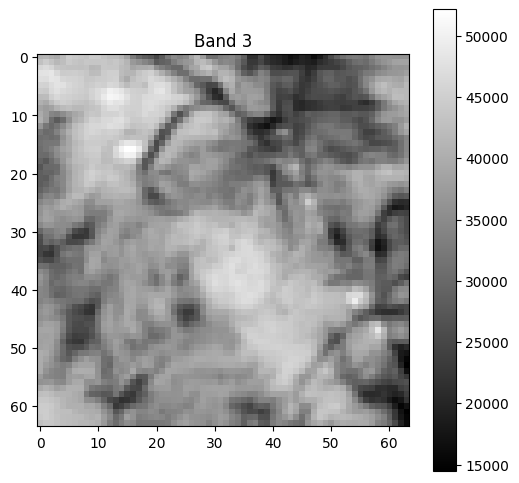

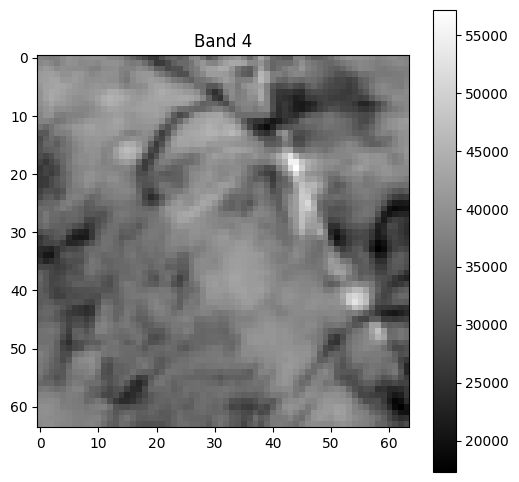

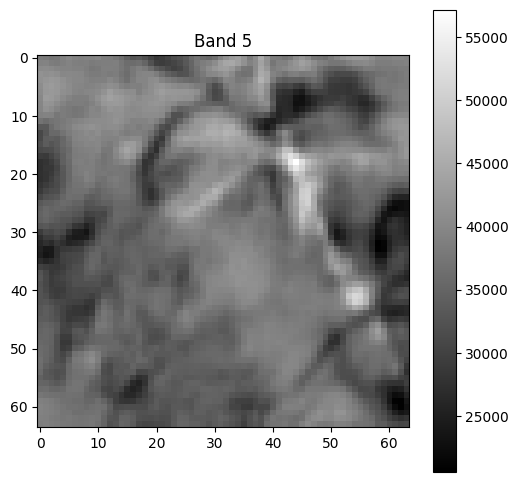

In [30]:
# Load the image
with rasterio.open(image_path) as src:
    for i in range(1, src.count + 1):  # Loop through all bands
        band = src.read(i)
        plt.figure(figsize=(6, 6))
        plt.imshow(band, cmap='gray')
        plt.title(f"Band {i}")
        plt.colorbar()
        plt.show()


>- Define bands & growth stages

In [31]:
# Define bands
BAND_RED = 3      
BAND_NIR = 4      
BAND_GREEN = 2 

# Define sugarcane growth stages
growth_stages = ["Germination", "Tillering", "Grand Growth", "Ripening"]

# Define Paths
base_path = Path('../../../data/MULTISPECTRAL/')
germination_path = Path(os.path.join(base_path, 'germination/patches/'))
tillering_path = Path(os.path.join(base_path, 'tillering/patches/'))
grand_growth_path = Path(os.path.join(base_path, 'grand_growth/patches/'))
ripening_path = Path(os.path.join(base_path, 'ripening/patches/'))

# Define folder paths for patches
patches_dir = {
    "Germination": germination_path,
    "Tillering": tillering_path,
    "Grand Growth": germination_path,
    "Ripening": ripening_path,
}

##### Setup operational functions

In [32]:
def compute_indices(image):
    """Compute NDVI and NDWI from a multispectral image."""
    red = image[BAND_RED].astype(np.float32)
    nir = image[BAND_NIR].astype(np.float32)
    green = image[BAND_GREEN].astype(np.float32)
    
    # Calculate NDWI
    ndwi = (green - nir) / (green + nir + 1e-10) # 1e-10 for avoide the zero divide
    # Calculate NDVI
    ndvi = (nir - red) / (nir + red + 1e-10)
    
    return np.nanmean(ndvi), np.nanmean(ndwi)  # Return mean values, ignoring NaN

In [33]:
def analyze_patches():
    """Compute and visualize NDVI & NDWI variations across growth stages."""
    ndvi_values = []
    ndwi_values = []

    for stage, folder in patches_dir.items():
        ndvi_stage = []
        ndwi_stage = []
        
        for file in os.listdir(folder):
            if file.endswith(".tif"):
                with rasterio.open(os.path.join(folder, file)) as src:
                    image = src.read()
                    ndvi, ndwi = compute_indices(image)
                    ndvi_stage.append(ndvi)
                    ndwi_stage.append(ndwi)

        # Compute average NDVI & NDWI for the growth stage
        ndvi_values.append(np.nanmean(ndvi_stage))
        ndwi_values.append(np.nanmean(ndwi_stage))

    # Plot Graphs
    plot_variations(ndvi_values, ndwi_values)

def plot_variations(ndvi_values, ndwi_values):
    """Plot NDVI and NDWI variations over growth stages."""
    plt.figure(figsize=(12, 5))

    # 1. NDVI Variation
    plt.subplot(1, 3, 1)
    plt.plot(growth_stages, ndvi_values, marker='o', linestyle='-', color='green', label="NDVI")
    plt.xlabel("Growth Stage")
    plt.ylabel("NDVI Value")
    plt.title("NDVI Variation Across Growth Stages")
    plt.grid(True)

    # 2. NDWI Variation
    plt.subplot(1, 3, 2)
    plt.plot(growth_stages, ndwi_values, marker='s', linestyle='-', color='blue', label="NDWI")
    plt.xlabel("Growth Stage")
    plt.ylabel("NDWI Value")
    plt.title("NDWI Variation Across Growth Stages")
    plt.grid(True)

    # 3. NDVI & NDWI Together
    plt.subplot(1, 3, 3)
    plt.plot(growth_stages, ndvi_values, marker='o', linestyle='-', color='green', label="NDVI")
    plt.plot(growth_stages, ndwi_values, marker='s', linestyle='-', color='blue', label="NDWI")
    plt.xlabel("Growth Stage")
    plt.ylabel("Index Value")
    plt.title("NDVI & NDWI Across Growth Stages")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

##### Run the analysis

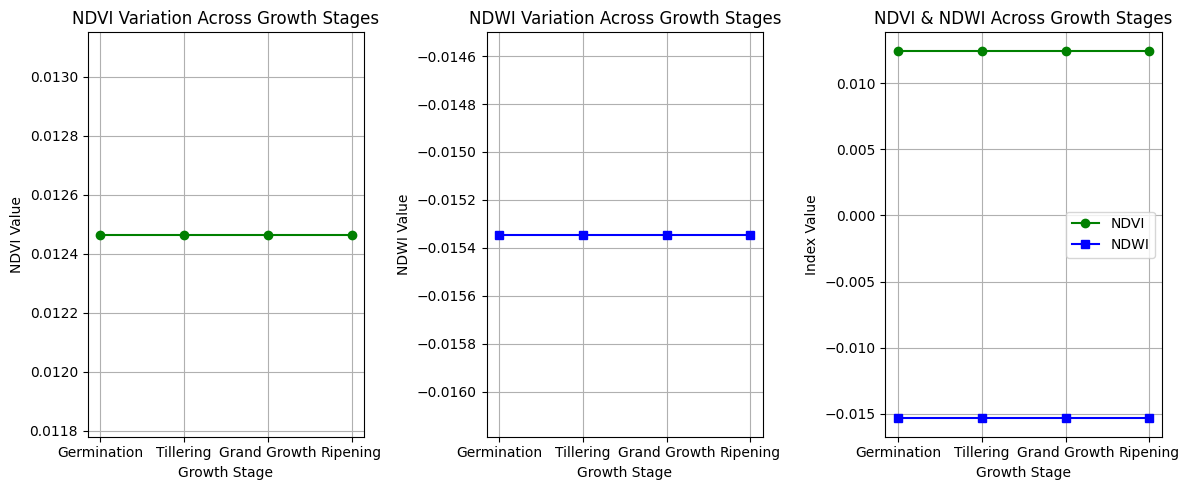

In [34]:
analyze_patches()
